In [4]:
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
import os

from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

import pandas as pd
from sodapy import Socrata
from config import CHI_API_Key
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", app_token = CHI_API_Key)
# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")
# First 2000 results, returned as JSON from API / converted to Python list ofS
# dictionaries by sodapy.
results = client.get("85ca-t3if", limit= 500000)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [5]:
results_df

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,crash_date_est_i,photos_taken_i,private_property_i,statements_taken_i,work_zone_i,work_zone_type,workers_present_i,dooring_i,rd_no,lane_cnt
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,2020-11-17T00:25:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,2020-11-16T20:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,2020-11-16T19:30:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,2020-11-16T19:17:00.000,10,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,2020-11-16T18:41:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455990,964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...,2014-06-25T19:00:00.000,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JC321679,NaN
455991,1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...,2014-02-24T19:45:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HZ164689,NaN
455992,957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...,2014-01-21T07:40:00.000,30,YIELD,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HZ122950,NaN
455993,f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...,2014-01-18T18:14:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JB442550,NaN


In [6]:
results_df.columns

Index(['crash_record_id', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'intersection_related_i', 'damage',
       'date_police_notified', 'prim_contributory_cause',
       'sec_contributory_cause', 'street_no', 'street_direction',
       'street_name', 'beat_of_occurrence', 'num_units', 'most_severe_injury',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'location',
       'hit_and_run_i', 'crash_date_est_i', 'photos_taken_i',
       'private_property_i', 'statements_taken_i', 'work_zone_i',
       'work_zone_type', 'workers_present_i', 

In [7]:
results_df.dtypes

crash_record_id                  object
crash_date                       object
posted_speed_limit               object
traffic_control_device           object
device_condition                 object
weather_condition                object
lighting_condition               object
first_crash_type                 object
trafficway_type                  object
alignment                        object
roadway_surface_cond             object
road_defect                      object
report_type                      object
crash_type                       object
intersection_related_i           object
damage                           object
date_police_notified             object
prim_contributory_cause          object
sec_contributory_cause           object
street_no                        object
street_direction                 object
street_name                      object
beat_of_occurrence               object
num_units                        object
most_severe_injury               object


In [8]:
# Create file with the columns needed
geo_df = pd.DataFrame(results_df[['crash_record_id', 'latitude','longitude', 'crash_month', 'crash_day_of_week', 'crash_hour', 'weather_condition', 'lighting_condition', 'damage', 'crash_type', 'injuries_total', 'posted_speed_limit', 'prim_contributory_cause']])
geo_df.head(10)

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,11,3,0,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,30,DISREGARDING TRAFFIC SIGNALS
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,11,2,20,CLEAR,"DARKNESS, LIGHTED ROAD",$500 OR LESS,NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,11,2,19,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,11,2,19,CLEAR,DARKNESS,"OVER $1,500",NO INJURY / DRIVE AWAY,0,10,UNABLE TO DETERMINE
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,30,NOT APPLICABLE
5,7e18f782615baadc81e8ce176308f52c689a5288f975d1...,41.749345343,-87.72175905,11,2,18,CLEAR,DARKNESS,"$501 - $1,500",NO INJURY / DRIVE AWAY,0,25,UNABLE TO DETERMINE
6,cadceeafcb1e45ce47e62264e5f6f9590a4ac79df5d020...,41.844256369,-87.717376718,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
7,9191faf0be945a9958fbb8aa68ea1fc595d8a906cc6a2e...,41.986933451,-87.701335374,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,30,DISTRACTION - FROM INSIDE VEHICLE
8,f3b3eaaf8a2b4c2b3bc98ceb46a61524c294d8ab58fce1...,41.955505451,-87.693418201,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,1,30,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,..."
9,05b17731f9e4773b8142a04a8ec8d302fd72cbb6865990...,41.903156154,-87.672422319,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",NO INJURY / DRIVE AWAY,0,30,DISTRACTION - FROM OUTSIDE VEHICLE


In [9]:
geo_df.describe()

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
count,455995,453523,453523,455995,455995,455995,455995,455995,455995,455995,455095,455995,455995
unique,455995,202007,201991,12,7,24,12,6,3,2,18,42,40
top,6dbea0fc32e61dde3a1f705a68a8765ce83a67d588a568...,41.976201139,-87.905309125,10,6,16,CLEAR,DAYLIGHT,"OVER $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
freq,1,583,583,46480,74175,34918,362281,298464,261791,345107,396739,335791,167327


In [10]:
#how many n/a in latitute
geo_df['latitude'].isnull().sum()

2472

In [11]:
#drop rows where Latitude is N/A
geo_df2 = geo_df[geo_df['latitude'].notna()]
geo_df2.describe()

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
count,453523,453523,453523,453523,453523,453523,453523,453523,453523,453523,452628,453523,453523
unique,453523,202007,201991,12,7,24,12,6,3,2,18,42,40
top,6dbea0fc32e61dde3a1f705a68a8765ce83a67d588a568...,41.976201139,-87.905309125,10,6,16,CLEAR,DAYLIGHT,"OVER $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
freq,1,583,583,46231,73812,34742,360395,296914,260330,343221,394581,334625,166586


In [12]:
#grouped just to see how many crashes there were for each hour. 
group_df = geo_df2.groupby(["crash_month",]).count()
group_df = group_df.sort_values(["crash_month"], ascending=True)
group_df

,crash_record_id,latitude,longitude,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
crash_month,,,,,,,,,,,,
1,34257,34257,34257,34257,34257,34257,34257,34257,34257,34201,34257,34257
10,46231,46231,46231,46231,46231,46231,46231,46231,46231,46136,46231,46231
11,39327,39327,39327,39327,39327,39327,39327,39327,39327,39242,39327,39327
12,36815,36815,36815,36815,36815,36815,36815,36815,36815,36745,36815,36815
2,32821,32821,32821,32821,32821,32821,32821,32821,32821,32748,32821,32821
3,33591,33591,33591,33591,33591,33591,33591,33591,33591,33515,33591,33591
4,31305,31305,31305,31305,31305,31305,31305,31305,31305,31245,31305,31305
5,36727,36727,36727,36727,36727,36727,36727,36727,36727,36669,36727,36727
6,37789,37789,37789,37789,37789,37789,37789,37789,37789,37700,37789,37789


In [13]:
geo_df2.dtypes

crash_record_id            object
latitude                   object
longitude                  object
crash_month                object
crash_day_of_week          object
crash_hour                 object
weather_condition          object
lighting_condition         object
damage                     object
crash_type                 object
injuries_total             object
posted_speed_limit         object
prim_contributory_cause    object
dtype: object

In [14]:
#what are the values in the weather_condition column
geo_df2['weather_condition'].unique()

array(['CLEAR', 'UNKNOWN', 'SEVERE CROSS WIND GATE', 'RAIN',
       'FREEZING RAIN/DRIZZLE', 'CLOUDY/OVERCAST', 'OTHER', 'SNOW',
       'FOG/SMOKE/HAZE', 'SLEET/HAIL', 'BLOWING SAND, SOIL, DIRT',
       'BLOWING SNOW'], dtype=object)

In [15]:
geo_df2['lighting_condition'].unique()

array(['DARKNESS, LIGHTED ROAD', 'DARKNESS', 'UNKNOWN', 'DUSK',
       'DAYLIGHT', 'DAWN'], dtype=object)

In [16]:
geo_df2['damage'].unique()

array(['OVER $1,500', '$500 OR LESS', '$501 - $1,500'], dtype=object)

In [17]:
geo_df2['crash_type'].unique()

array(['INJURY AND / OR TOW DUE TO CRASH', 'NO INJURY / DRIVE AWAY'],
      dtype=object)

In [18]:
geo_df2['injuries_total'].unique()

array(['0', '1', '2', '4', nan, '5', '3', '7', '6', '8', '10', '12', '15',
       '19', '9', '13', '16', '11', '21'], dtype=object)

In [19]:
geo_df2['posted_speed_limit'].unique()

array(['30', '10', '25', '20', '35', '15', '40', '5', '45', '0', '55',
       '3', '26', '50', '24', '34', '65', '36', '39', '1', '33', '60',
       '29', '32', '31', '49', '2', '11', '70', '12', '14', '6', '9',
       '22', '7', '23', '4', '16', '63', '18', '38', '99'], dtype=object)

In [20]:
geo_df2['prim_contributory_cause'].unique()

array(['DISREGARDING TRAFFIC SIGNALS', 'UNABLE TO DETERMINE',
       'NOT APPLICABLE', 'DISTRACTION - FROM INSIDE VEHICLE',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'IMPROPER LANE USAGE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'IMPROPER TURNING/NO SIGNAL',
       'FOLLOWING TOO CLOSELY', 'IMPROPER OVERTAKING/PASSING',
       'DRIVING ON WRONG SIDE/WRONG WAY', 'PHYSICAL CONDITION OF DRIVER',
       'DISREGARDING STOP SIGN', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'IMPROPER BACKING', 'WEATHER', 'DISREGARDING OTHER TRAFFIC SIGNS',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'EQUIPMENT - VEHICLE CONDITION', 'DISREGARDING ROAD MARKINGS',
       'HAD BEEN DRINKING (USE WHEN ARREST IS

In [21]:
#took out the prim_contributory_cause column
geo_df3 =  pd.DataFrame(results_df[['crash_record_id', 'latitude','longitude', 'crash_month', 'crash_day_of_week', 'crash_hour', 'weather_condition', 'lighting_condition', 'damage', 'crash_type', 'injuries_total', 'posted_speed_limit']])
geo_df.head(10)

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,prim_contributory_cause
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,11,3,0,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,30,DISREGARDING TRAFFIC SIGNALS
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,11,2,20,CLEAR,"DARKNESS, LIGHTED ROAD",$500 OR LESS,NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,11,2,19,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,11,2,19,CLEAR,DARKNESS,"OVER $1,500",NO INJURY / DRIVE AWAY,0,10,UNABLE TO DETERMINE
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,30,NOT APPLICABLE
5,7e18f782615baadc81e8ce176308f52c689a5288f975d1...,41.749345343,-87.72175905,11,2,18,CLEAR,DARKNESS,"$501 - $1,500",NO INJURY / DRIVE AWAY,0,25,UNABLE TO DETERMINE
6,cadceeafcb1e45ce47e62264e5f6f9590a4ac79df5d020...,41.844256369,-87.717376718,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","$501 - $1,500",NO INJURY / DRIVE AWAY,0,30,UNABLE TO DETERMINE
7,9191faf0be945a9958fbb8aa68ea1fc595d8a906cc6a2e...,41.986933451,-87.701335374,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,0,30,DISTRACTION - FROM INSIDE VEHICLE
8,f3b3eaaf8a2b4c2b3bc98ceb46a61524c294d8ab58fce1...,41.955505451,-87.693418201,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,1,30,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,..."
9,05b17731f9e4773b8142a04a8ec8d302fd72cbb6865990...,41.903156154,-87.672422319,11,2,18,CLEAR,"DARKNESS, LIGHTED ROAD","OVER $1,500",NO INJURY / DRIVE AWAY,0,30,DISTRACTION - FROM OUTSIDE VEHICLE


In [22]:
#Change data to a corresponding number
gender = {'male': 1,'female': 2} 
geo_df3['crash_type'] = geo_df3['crash_type'].replace(['INJURY AND / OR TOW DUE TO CRASH'],1)
geo_df3['crash_type'] = geo_df3['crash_type'].replace(['NO INJURY / DRIVE AWAY'],2)
geo_df3['damage'] = geo_df3['damage'].replace(['OVER $1,500'],1)
geo_df3['damage'] = geo_df3['damage'].replace(['$501 - $1,500'],2)
geo_df3['damage'] = geo_df3['damage'].replace(['$500 OR LESS'],3)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DAYLIGHT'],1)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DARKNESS, LIGHTED ROAD'],2)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DUSK'],3)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DAWN'],4)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['UNKNOWN'],5)
geo_df3['lighting_condition'] = geo_df3['lighting_condition'].replace(['DARKNESS'],6)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['CLEAR'],1)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['RAIN'],2)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['UNKNOWN'],3)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['CLOUDY/OVERCAST'],4)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['OTHER'],5)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['UNKNOWN'],6)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['SNOW'],7)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['SEVERE CROSS WIND GATE'],8)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['FREEZING RAIN/DRIZZLE'],9)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['FOG/SMOKE/HAZE'],10)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['BLOWING SAND, SOIL, DIRT'],11)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['BLOWING SNOW'],12)
geo_df3['weather_condition'] = geo_df3['weather_condition'].replace(['SLEET/HAIL'],13)
geo_df3['injuries_total'] = geo_df3['injuries_total'].replace(['nan'],0)
geo_df3

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,11,3,0,1,2,1,1,0,30
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,11,2,20,1,2,3,2,0,30
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,11,2,19,1,2,1,2,0,30
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,11,2,19,1,6,1,2,0,10
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,11,2,18,1,2,1,1,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
455990,964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...,41.835886103,-87.724474013,6,4,19,2,1,2,2,0,30
455991,1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...,41.884016475,-87.701142758,2,2,19,2,1,2,2,0,30
455992,957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...,41.760710194,-87.56194603,1,3,7,1,1,1,1,1,30
455993,f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...,41.885609917,-87.63875619,1,7,18,1,3,1,2,0,30


In [23]:
geo_df3.dtypes

crash_record_id       object
latitude              object
longitude             object
crash_month           object
crash_day_of_week     object
crash_hour            object
weather_condition      int64
lighting_condition     int64
damage                 int64
crash_type             int64
injuries_total        object
posted_speed_limit    object
dtype: object

In [24]:
#changed the data type to see if there were any corrolations
geo_df3["crash_hour"] = geo_df3["crash_hour"].astype(int)
geo_df3["crash_day_of_week"] = geo_df3["crash_day_of_week"].astype(int)
geo_df3["crash_month"] = geo_df3["crash_month"].astype(int)
geo_df3["posted_speed_limit"] = geo_df3["posted_speed_limit"].astype(int)

In [25]:
geo_df3.corr()

,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,posted_speed_limit
crash_month,1.000000,-0.007110,0.005402,-0.092099,0.030642,-0.006306,-0.018509,0.010941
crash_day_of_week,-0.007110,1.000000,0.064398,-0.014843,-0.005031,0.004186,0.008752,0.007315
crash_hour,0.005402,0.064398,1.000000,-0.041475,0.100645,0.034498,0.045351,0.018335
weather_condition,-0.092099,-0.014843,-0.041475,1.000000,0.120163,-0.017976,-0.014302,-0.000897
lighting_condition,0.030642,-0.005031,0.100645,0.120163,1.000000,-0.026531,-0.005626,-0.006628
damage,-0.006306,0.004186,0.034498,-0.017976,-0.026531,1.000000,0.194452,-0.043212
crash_type,-0.018509,0.008752,0.045351,-0.014302,-0.005626,0.194452,1.000000,-0.107121
posted_speed_limit,0.010941,0.007315,0.018335,-0.000897,-0.006628,-0.043212,-0.107121,1.000000


In [26]:
geo_df3.dtypes

crash_record_id       object
latitude              object
longitude             object
crash_month            int32
crash_day_of_week      int32
crash_hour             int32
weather_condition      int64
lighting_condition     int64
damage                 int64
crash_type             int64
injuries_total        object
posted_speed_limit     int32
dtype: object

In [27]:
#change the data types for the entrie set back to a string. Couldn't get Kmeans to work with mixed data types.
geo_df3 = geo_df3.applymap(str)
geo_df3.dtypes

crash_record_id       object
latitude              object
longitude             object
crash_month           object
crash_day_of_week     object
crash_hour            object
weather_condition     object
lighting_condition    object
damage                object
crash_type            object
injuries_total        object
posted_speed_limit    object
dtype: object

In [69]:
#renamed what will be duplicated colimns in the join so I can drop them later.
geo_df3 = geo_df3.rename(columns = {'latitude':'latitude1', 'longitude':'longitude1', 'crash_record_id': 'crash_record_id1'})
geo_df3

,crash_record_id1,latitude1,longitude1,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,11,3,0,1,2,1,1,0,30
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,11,2,20,1,2,3,2,0,30
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,11,2,19,1,2,1,2,0,30
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,11,2,19,1,6,1,2,0,10
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,11,2,18,1,2,1,1,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
455990,964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...,41.835886103,-87.724474013,6,4,19,2,1,2,2,0,30
455991,1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...,41.884016475,-87.701142758,2,2,19,2,1,2,2,0,30
455992,957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...,41.760710194,-87.56194603,1,3,7,1,1,1,1,1,30
455993,f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...,41.885609917,-87.63875619,1,7,18,1,3,1,2,0,30


In [70]:
geo_df3['latitude1'].isnull().sum()

0

In [71]:
geo_df3.isnull().sum()

crash_record_id1      0
latitude1             0
longitude1            0
crash_month           0
crash_day_of_week     0
crash_hour            0
weather_condition     0
lighting_condition    0
damage                0
crash_type            0
injuries_total        0
posted_speed_limit    0
dtype: int64

In [31]:
# Drop null coordinates (one more time)
geo_df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

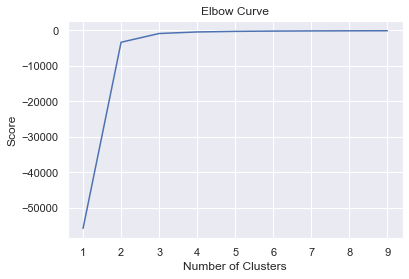

In [32]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = geo_df[['latitude']]
X_axis = geo_df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [33]:
# Variable with the Longitude and Latitude
X=geo_df.loc[:,['crash_record_id','latitude','longitude']]
X.head(10)

,crash_record_id,latitude,longitude
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443
5,7e18f782615baadc81e8ce176308f52c689a5288f975d1...,41.749345343,-87.72175905
6,cadceeafcb1e45ce47e62264e5f6f9590a4ac79df5d020...,41.844256369,-87.717376718
7,9191faf0be945a9958fbb8aa68ea1fc595d8a906cc6a2e...,41.986933451,-87.701335374
8,f3b3eaaf8a2b4c2b3bc98ceb46a61524c294d8ab58fce1...,41.955505451,-87.693418201
9,05b17731f9e4773b8142a04a8ec8d302fd72cbb6865990...,41.903156154,-87.672422319


In [34]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,crash_record_id,latitude,longitude,cluster_label
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,2
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,4
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,0
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,3
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,5
5,7e18f782615baadc81e8ce176308f52c689a5288f975d1...,41.749345343,-87.72175905,5
6,cadceeafcb1e45ce47e62264e5f6f9590a4ac79df5d020...,41.844256369,-87.717376718,5
7,9191faf0be945a9958fbb8aa68ea1fc595d8a906cc6a2e...,41.986933451,-87.701335374,0
8,f3b3eaaf8a2b4c2b3bc98ceb46a61524c294d8ab58fce1...,41.955505451,-87.693418201,0
9,05b17731f9e4773b8142a04a8ec8d302fd72cbb6865990...,41.903156154,-87.672422319,3


In [35]:
#X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [36]:
#joined the cluster label with the data
result1 = pd.concat([X, geo_df3], axis=1, join='inner')
result1

,crash_record_id,latitude,longitude,cluster_label,crash_record_id1,latitude1,longitude1,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,2,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,11,3,0,1,2,1,1,0,30
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,4,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,11,2,20,1,2,3,2,0,30
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,0,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,11,2,19,1,2,1,2,0,30
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,11,2,19,1,6,1,2,0,10
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,5,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,11,2,18,1,2,1,1,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455990,964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...,41.835886103,-87.724474013,5,964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...,41.835886103,-87.724474013,6,4,19,2,1,2,2,0,30
455991,1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...,41.884016475,-87.701142758,3,1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...,41.884016475,-87.701142758,2,2,19,2,1,2,2,0,30
455992,957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...,41.760710194,-87.56194603,2,957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...,41.760710194,-87.56194603,1,3,7,1,1,1,1,1,30
455993,f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...,41.885609917,-87.63875619,3,f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...,41.885609917,-87.63875619,1,7,18,1,3,1,2,0,30


In [37]:
result1.dtypes

crash_record_id       object
latitude              object
longitude             object
cluster_label          int32
crash_record_id1      object
latitude1             object
longitude1            object
crash_month           object
crash_day_of_week     object
crash_hour            object
weather_condition     object
lighting_condition    object
damage                object
crash_type            object
injuries_total        object
posted_speed_limit    object
dtype: object

In [38]:
result2 =  pd.DataFrame(result1[['crash_record_id', 'latitude','longitude', 'crash_month', 'crash_day_of_week', 'crash_hour', 'weather_condition', 'lighting_condition', 'damage', 'crash_type', 'injuries_total', 'posted_speed_limit', 'cluster_label']])
result2

,crash_record_id,latitude,longitude,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,damage,crash_type,injuries_total,posted_speed_limit,cluster_label
0,b64ad753f9db5f7f58f5b48b03d0071bba21b3637f1c46...,41.773292896,-87.586442368,11,3,0,1,2,1,1,0,30,2
1,5c0eee487aba47cb8758d6f7c24a4ef3554318853e8f4c...,41.945925249,-87.766610632,11,2,20,1,2,3,2,0,30,4
2,b67c3dd87dbd8894b2cafa9c5e93b78c31b7069cb1229a...,41.998217921,-87.660695256,11,2,19,1,2,1,2,0,30,0
3,4b14ed46f2a108cb01ac02ea2ac50c2b41f7230db3ecca...,41.834311071,-87.663899893,11,2,19,1,6,1,2,0,10,3
4,41c99f448d0b8c77d1808d5926144f1b7a0f70c9b86171...,41.786485236,-87.676665443,11,2,18,1,2,1,1,0,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455990,964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...,41.835886103,-87.724474013,6,4,19,2,1,2,2,0,30,5
455991,1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...,41.884016475,-87.701142758,2,2,19,2,1,2,2,0,30,3
455992,957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...,41.760710194,-87.56194603,1,3,7,1,1,1,1,1,30,2
455993,f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...,41.885609917,-87.63875619,1,7,18,1,3,1,2,0,30,3


In [39]:
result2.describe()

,cluster_label
count,453523.000000
mean,2.863725
std,1.563603
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [40]:
result2["crash_hour"] = result2["crash_hour"].astype(int)
result2["crash_day_of_week"] = result2["crash_day_of_week"].astype(int)
result2["crash_month"] = result2["crash_month"].astype(int)
result2["posted_speed_limit"] = result2["posted_speed_limit"].astype(int)
result2["damage"] = result2["damage"].astype(int)
result2["cluster_label"] = result2["cluster_label"].astype(int)

In [41]:
result2.describe()

,crash_month,crash_day_of_week,crash_hour,damage,posted_speed_limit,cluster_label
count,453523.00000,453523.000000,453523.000000,453523.000000,453523.000000,453523.000000
mean,6.77653,4.126671,13.219854,1.556638,28.293934,2.863725
std,3.39084,1.973972,5.491553,0.712813,6.498441,1.563603
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,4.00000,2.000000,9.000000,1.000000,30.000000,2.000000
50%,7.00000,4.000000,14.000000,1.000000,30.000000,3.000000
75%,10.00000,6.000000,17.000000,2.000000,30.000000,4.000000
max,12.00000,7.000000,23.000000,3.000000,99.000000,5.000000


In [36]:
#export data
result2.to_csv(r'fulldata.csv', index = True, header = True)

In [42]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [43]:
#Hot Coding
# define example
data = result2['damage']
values = array(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
damage2 = onehot_encoded
damage2
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [44]:
#Hot Coding
# define example
data = result2['crash_hour']
values = array(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
hour = onehot_encoded
hour
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
#Hot Coding
# define example
data = result2['posted_speed_limit']
values = array(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
speed = onehot_encoded
speed
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
#Hot Coding
# define example
data = result2['cluster_label']
values = array(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
cluster_label2 = onehot_encoded
cluster_label2
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [47]:
#Hot Coding
# define example
data = result2['crash_type']
values = array(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
crash = onehot_encoded
crash
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [48]:
result2.columns

Index(['crash_record_id', 'latitude', 'longitude', 'crash_month',
       'crash_day_of_week', 'crash_hour', 'weather_condition',
       'lighting_condition', 'damage', 'crash_type', 'injuries_total',
       'posted_speed_limit', 'cluster_label'],
      dtype='object')

In [81]:
speed.shape

(453523, 42)

In [82]:
damage2.shape

(453523, 3)

In [84]:
#Regression
#Assign the data to X and y
X = hour
y = damage2 #.reshape(-1, 1)
print(X.shape, y.shape)

(453523, 24) (453523, 3)


In [85]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [86]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [87]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.004852879844283879
Testing Score: 0.004817881723826097


In [92]:
result2.columns

Index(['crash_record_id', 'latitude', 'longitude', 'crash_month',
       'crash_day_of_week', 'crash_hour', 'weather_condition',
       'lighting_condition', 'damage', 'crash_type', 'injuries_total',
       'posted_speed_limit', 'cluster_label'],
      dtype='object')

In [93]:
X = result2[["crash_day_of_week", "crash_type"]]
y = result2["damage"].values.reshape(-1, 1)
print(X.shape, y.shape)

(453523, 2) (453523, 1)


In [94]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [95]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [96]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.03769911921358815
Testing Score: 0.037662685657438355


In [52]:
result2.dtypes

crash_record_id       object
latitude              object
longitude             object
crash_month           object
crash_day_of_week     object
crash_hour            object
weather_condition     object
lighting_condition    object
damage                object
crash_type            object
injuries_total        object
posted_speed_limit    object
cluster_label          int32
dtype: object

In [53]:
#result2["crash_record_id"] = geo_df3["crash_record_id"].astype(int)
#result2["latitude"] = geo_df3["latitude"].astype(int)
#result2["longitude"] = geo_df3["longitude"].astype(float)
result2["crash_month"] = geo_df3["crash_month"].astype(float)
result2["crash_day_of_week"] = geo_df3["crash_day_of_week"].astype(float)
result2["crash_hour"] = geo_df3["crash_hour"].astype(float)
result2["weather_condition"] = geo_df3["weather_condition"].astype(float)
result2["lighting_condition"] = geo_df3["lighting_condition"].astype(float)
result2["damage"] = geo_df3["damage"].astype(float)
result2["crash_type"] = geo_df3["crash_type"].astype(float)
result2["injuries_total"] = geo_df3["injuries_total"].astype(float)
result2["posted_speed_limit"] = geo_df3["posted_speed_limit"].astype(float)
#result2["cluster_label"] = geo_df3["cluster_label"].astype(float)

In [54]:
result2.dtypes

crash_record_id        object
latitude               object
longitude              object
crash_month           float64
crash_day_of_week     float64
crash_hour            float64
weather_condition     float64
lighting_condition    float64
damage                float64
crash_type            float64
injuries_total        float64
posted_speed_limit    float64
cluster_label           int32
dtype: object

In [62]:
results3 = pd.DataFrame(result2[['crash_month', 'crash_day_of_week', 'crash_hour', 'weather_condition', 'lighting_condition', 'damage', 'crash_type', 'posted_speed_limit']])
results3.dtypes

crash_month            int32
crash_day_of_week      int32
crash_hour             int32
weather_condition     object
lighting_condition    object
damage                 int32
crash_type            object
posted_speed_limit     int32
dtype: object

In [243]:
#KNN
y = results3["damage"]
target_names = ['OVER $1,500', '$501 - $1,500', '$500 OR LESS']

In [244]:
X = results3.drop("damage", axis =1)
X.head()

,crash_month,crash_day_of_week,crash_hour,weather_condition,lighting_condition,crash_type,posted_speed_limit
0,11.0,2.0,0.0,1.0,3.0,1.0,30.0
1,11.0,1.0,23.0,1.0,2.0,2.0,25.0
2,11.0,1.0,23.0,1.0,2.0,2.0,30.0
3,11.0,1.0,22.0,1.0,2.0,1.0,30.0
4,11.0,1.0,22.0,1.0,2.0,1.0,30.0


In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [246]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [247]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.574/0.466
k: 3, Train/Test Score: 0.584/0.521
k: 5, Train/Test Score: 0.586/0.538
k: 7, Train/Test Score: 0.583/0.539
k: 9, Train/Test Score: 0.583/0.545
k: 11, Train/Test Score: 0.582/0.548
k: 13, Train/Test Score: 0.581/0.550
k: 15, Train/Test Score: 0.581/0.552
k: 17, Train/Test Score: 0.581/0.556
k: 19, Train/Test Score: 0.580/0.557


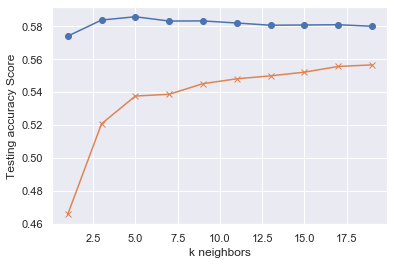

In [248]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [51]:
#tried to put the one hot coding varriables in a dataset to get the KNN to work but when I tested it, it didn't work
results10 = pd.DataFrame({'crash' : [crash],
                          'cluster_label2' : [cluster_label2],
                          'speed': [speed],
                          'damage2' : [damage2]})


In [52]:
results11 = pd.DataFrame({'crash' : [crash],
                          'cluster_label2' : [cluster_label2],
                          'speed': [speed]})


In [103]:
#KNN no one hot coding
y = damage2
target_names = ['OVER $1,500', '$501 - $1,500', '$500 OR LESS']

In [106]:
X = crash

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [108]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()